<a href="https://colab.research.google.com/github/NCHUIT/.github/blob/main/%E4%B8%AD%E8%88%88%E5%A4%A7%E5%AD%B8%E9%81%B8%E8%AA%B2%E7%A8%8B%E5%BC%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 中興大學 1092 學期選課

## 前言
執行請點填寫區段左上角的三角形。

要執行需要登入Google，<a href='https://research.google.com/colaboratory/intl/zh-TW/faq.html'>Colab</a> 是 Google 的，不必擔心 Google 帳號會被盜。

在意密碼洩漏問題，不必擔心，**這個共用筆記不會儲存任何執行結果**，或可以複製程式碼到新的colab筆記本執行，每個填寫區段的右上角的 "…" 有顯示程式碼的開關。
 
在程式執行期間加選，若無法正常操作，代表間隔太短，**你需要在間隔內完成操作**。

開發者免責聲明：此頁面之程式僅供學習用途，請勿用於商業用途，為避免程式出錯，程式執行期間還請手動選課。

# 登入 <sub>(密碼若知道伺服器密碼(固定)就填伺服器密碼，會加速執行。)</sub>

In [ ]:
# @title 登入-資料填寫&執行
from IPython.display import clear_output
# #@title 登入-資料填寫&執行
from requests import Session, post
from bs4 import BeautifulSoup as bs
from json import loads
from random import random
from getpass import getpass
from datetime import datetime, timedelta
from time import sleep

# @markdown 學號
uid = '4108056020' #@param {type:"string"}
# @markdown 密碼 (或<b>伺服器密碼</b>)
pwd = '99990420' #@param {type:"string"}
# @markdown  <a href="https://notify-bot.line.me/my/">LINE Notify 通知權杖(點我註冊)</a>，<b>如果不需要通知請留空</b>
token = '3ne7tkE1QtscrSpR8HTo7PG3b82OEBUu0YBBAxk1xlO' #@param {type:"string"}

## 變數初始化
plsql = 'https://onepiece.nchu.edu.tw/cofsys/plsql/'
headers = { 'User-Agent': '' }

## 函數初始化
def wait(secends = 3, message=''):
    if (message): print(message, end = '')
    else: print(secends, '秒後重試', end = '')
    if (secends):
        for time_count in range(secends):
            sleep(1)
            print('.', end = '')
    sleep(random())
    print('.')
    clear_output(True)

def lineNotify(message:str, notificationDisabled=False):
    if(len(message)>1000): message = message[:1000]
    x = post( url = 'https://notify-api.line.me/api/notify',
        headers = { 'Authorization': 'Bearer '+token },
        data = { 'message': '['+str(datetime.today()+timedelta(hours=8))+'] '+message ,
                 'notificationDisabled':notificationDisabled })
    if(x.status_code == 200): resault = '成功發送 LINE Notify 通知: "'+message+'"'
    else: resault = loads(x.text)['message']
    print('['+str(datetime.today()+timedelta(hours=8))+'] '+resault)

# 登入(預置或存取伺服器cookie)
rs = Session()
if (not uid): uid = input('請輸入學號: ')
if (not pwd): pwd = getpass('請輸入密碼: ')
rs.cookies.set('cookie_psstud', uid)
rs.cookies.set('cookie_pwd', pwd)
r=rs.get( plsql+'stud_frameset',headers=headers )
if (r.text.rfind('名稱或密碼錯誤') != -1):
    rs=Session()
    rs.post( plsql+'ACAD_PASSCHK',headers=headers,data={'v_emp':uid,'v_pwd':pwd} )
r=rs.get( plsql+'stud_frameset',headers=headers )

count = 0
while (r.text.rfind('名稱或密碼錯誤') != -1):
    r,rs=None,Session()
    count += 1
    print('['+str(datetime.today()+timedelta(hours=8))+'] 登入失敗第', count,'次，帳號或密碼錯誤，請重新輸入...')
    uid,pwd = input('學號: '), getpass('登入密碼: ')
    rs.post( plsql+'ACAD_PASSCHK',headers=headers,data={'v_emp':uid,'v_pwd':pwd} )
    r=rs.get( plsql+'stud_frameset',headers=headers )

r=rs.get( plsql+'studframe_left', headers=headers )
welcomeMsg=bs(r.text, 'lxml').find('font', {'size': '3'}).text.replace('\n',' ')

if (token): lineNotify('登入成功 '+welcomeMsg+' 伺服器密碼:'+rs.cookies.get('cookie_pwd'))
else: print('['+str(datetime.today()+timedelta(hours=8))+'] 登入成功', welcomeMsg, ' 伺服器密碼:', rs.cookies.get('cookie_pwd'))

print()

# 1092 學期加退選於 110/02/22 10:00 開始 <sub>(02/24 10:00 清除候補)</sub>

於開始時搶課請確保現有通識課程(含候補)小於 4 門，欲搶之課程也請確保與現有通識課程(含候補)相加後不大於 4 門。

In [ ]:
# @title 課號加選-資料填寫&執行

# @markdown 選課號碼 (注意:非<a href='#scrollTo=rf31bcNpE1MU'>課程代號</a>)<br><small><small><small><small>採直接加選系統，可以填入<b>任意課程選課號碼(最多10門)</b>，請確保號碼正確，多個請用空格隔開，格式如:<br>4705 3803 1750 3494</small></small></small></small>
class_nbr = '0348 0462 3132' #@param {type:"string"}
# @markdown 換課 <small><small><small><small>(衝堂或名稱相同的同時課程可選時自動退選)</small></small></small></small>
change = True #@param {type:"boolean"}
# @markdown 載入失敗(未開放)時重試
load_retry = True #@param {type:"boolean"}
# @markdown 加選失敗時重試 <small><small><small><small>(除課程滿額外不設此限)</small></small></small></small>
add_retry = True #@param {type:"boolean"}
# @markdown 重試間隔(單位：秒)，最後一秒會隨機取0~1之間。
delay = 2 #@param {type:"slider", min:0, max:60, step:1}

try: rs
except NameError:
    print('執行中斷：請先執行登入區塊')
    exit()

try: class_nbr = class_nbr.split(' ')
except: class_nbr = input("請以空格隔開輸入要加選的課程代號: ").split(' ')

if len(class_nbr)>10:
    class_nbr = class_nbr[:10]
    if token: lineNotify('欲加選課程大於10門，取前10門')
    else: print('['+str(datetime.today()+timedelta(hours=8))+'] 欲加選課程大於10門，取前10門')

data = class_nbr.copy()
while len(data)<10: data.append('')
data = { 'v_want': data }

if token: lineNotify('''設定:
'''+'選課號碼: '+' '.join(class_nbr)+'''
'''+'換課: '+('是' if change else '否')+'''
'''+'載入失敗時重試: '+('是' if load_retry else '否')+'''
'''+'加選失敗時重試: '+('是' if add_retry else '否')+'''
'''+'重試間隔: '+str(delay)+''' 秒
開始直接加選...''')
else: print('['+str(datetime.today()+timedelta(hours=8))+'''] 設定:
'''+'選課號碼: '+' '.join(class_nbr)+'''
'''+'換課: '+('是' if change else '否')+'''
'''+'載入失敗(未開放)時重試: '+('是' if load_retry else '否')+'''
'''+'加選失敗時重試: '+('是' if add_retry else '否')+'''
'''+'重試間隔: '+str(delay)+''' 秒
開始直接加選...''')
print()

## 課號加選-填寫，看開不開放，同時向伺服器拿'cookie_key'(若有)
r=rs.get(plsql+'enro_direct1_list',headers=headers)

load_count = 1
while (load_retry and r.text.rfind('本時段不開放此功能') != -1):
    r=None
    if load_count%(1800/(delay+1))==0: lineNotify('載入失敗第 '+str(load_count)+' 次，本時段不開放此功能。繼續重試...',True)
    else: print('['+str(datetime.today()+timedelta(hours=8))+'] 載入失敗第 ', load_count,' 次，本時段不開放此功能。',end='')
    load_count += 1
    wait(delay)

    now = datetime.today()+timedelta(hours=8)
    start = now.replace(hour=7, minute=58, second=59, microsecond=499999)
    end = now.replace(hour=9, minute=59, second=0, microsecond=0)
    while start<datetime.today()+timedelta(hours=8)<end:
        if not (datetime.today()+timedelta(hours=8) -now).seconds % 600: #每 10 分鐘發通知
            if token: lineNotify('等待系統維護，程式仍在執行中', True)
            else: print('['+str(datetime.today()+timedelta(hours=8))+'] 等待系統維護，程式仍在執行中')
        if not (datetime.today()+timedelta(hours=8) -now).seconds % 30: print('.',end='')
        sleep(1)

    r=rs.get(plsql+'enro_direct1_list',headers=headers)

# 課號加選-確認
print('['+str(datetime.today()+timedelta(hours=8))+'] 檢驗課號正確性...')
r=rs.post(plsql+'enro_direct2_chk',headers=headers,data=data)

# with open(r'選課\response\輸入課號加選\2.課號加選-確認-110-2-23.html', encoding="utf-8") as f: a=f.read()

table_chk = bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
while not table_chk:
    load_retry += 1
    r=rs.post(plsql+'enro_direct2_chk',headers=headers,data=data)
    table_chk = bs(r.text, 'lxml').find('table', {'cellpadding': '2'})

v_tick = []
skip_msg, skip = '無此選課號碼: ', 0
for each_class_nbr in class_nbr:
    tag = table_chk.find('td', string=each_class_nbr)
    if tag:
        value = tag.find_previous_sibling('td').find('input')
        if value: v_tick.append(value['value'])
        else:
            skip += 1
            skip_msg += each_class_nbr+' '
            class_nbr.remove(each_class_nbr)
print()

skip_msg += '，已略過。'
if skip:
    if token: lineNotify(skip_msg)
    else: print('['+str(datetime.today()+timedelta(hours=8))+'] '+skip_msg)
    print()

add_resault = '加選結果 '
cookie_key=False
if rs.cookies.get('cookie_key'):
    cookie_key=True
    add_resault += str(rs.cookies.get('cookie_key'))
add_resault += '''...
'''

## 課號加選-完成
data = { 'p_stud_no': uid, 'v_tick': v_tick }
r=rs.post(plsql+'enro_direct3_dml',headers=headers,data=data)

#with open(r'選課\response\輸入課號加選\3.課號加選-結果-110-2-23.html', encoding="utf-8") as f: a=f.read()

table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
while not table:
    load_retry += 1
    r=rs.post(plsql+'enro_direct3_dml',headers=headers,data=data)
    table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})

v_del=[]
retry, chang = False, False
if table and table_chk:
    ths_chk = table_chk.find_all('th')
    ths = table.find_all('th')
    rths = ths_chk[1:3]+ths_chk[7:]
    if ths[7]: rths.append(ths[7])
    add_resault += '-'.join([th.text for th in rths])+'''
'''
    for tr_chk, tr in zip(table_chk.find_all('tr'),table.find_all('tr')):
        tds_chk = tr_chk.find_all('td')
        for i in [2, 7]:
            if i>=len(tds_chk): break
            tds_chk[i].string = tds_chk[i].decode_contents()
            bi_chk = tds_chk[i].string.rfind('<br/>')
            if bi_chk: tds_chk[i].string = tds_chk[i].string[:bi_chk]
        tds = tr.find_all('td')
        if tds[0].form: break
        tds_chk = table_chk.find('td', string=tds[0].text).find_parent('tr').find_all('td')
        nbr = str(tds[7].text)[10:14]
        if nbr.isdigit() and int(tds_chk[8].text)>int(tds_chk[9].text): v_del.append(nbr)
        chang = chang or nbr.isdigit()
        retry = retry or chang or tds[7].text.find('課程已額滿') != -1
        rtds = tds_chk[1:3]+tds_chk[7:]
        if tds_chk[2].text=='無此選課號': rtds = tds_chk[1:3]
        if tds[7]: rtds.append(tds[7])
        add_resault += '-'.join([rtd.text for rtd in rtds])+'''
'''

change = change and chang
if change and v_del:
    drop_resault = '退選課程: '+' '.join(v_del)+''' ...
'''
    r = rs.get(plsql+'enro_del1_list',headers=headers)
    table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
    while not table:
        load_retry += 1
        r = rs.get(plsql+'enro_del1_list',headers=headers)
        table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
    v_del = [table.find('font',string=v).find_parent('td').find_previous_sibling('td').input['value'] for v in v_del]
    data = { 'v_del': v_del }
    rs.post(plsql+'enro_del2_check',headers=headers,data=data)
    r = rs.post(plsql+'enro_del3_drop',headers=headers,data=data)
    table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
    while not table:
        load_retry += 1
        rs.get(plsql+'enro_del1_list',headers=headers)
        rs.post(plsql+'enro_del2_check',headers=headers,data=data)
        r = rs.post(plsql+'enro_del3_drop',headers=headers,data=data)
        table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})

    ths = table.find_all('th')
    rths = [ths[0],ths[1],ths[5],ths[6]]
    drop_resault += '-'.join([th.text for th in rths])+'''
'''
    tr_count = 0
    tds = table.find_all('td')
    for td in tds[1::7]+tds[5::7]:
        td.font.string = td.font.decode_contents()
        bi = td.font.string.rfind('<br/>')
        if bi: td.font.string = td.font.string[:bi]
    n = int(len(tds)//7)
    for i in range(n):
        drop_resault += '-'.join([td.text for td in [tds[0+7*i],tds[1+7*i],tds[5+7*i],tds[6+7*i]]])+'''
'''
    data = { 'p_stud_no': uid, 'v_tick': v_tick }
    rs.post(plsql+'enro_direct3_dml',headers=headers,data=data)
    if token: lineNotify(drop_resault[:-1])
    else: print('['+str(datetime.today()+timedelta(hours=8))+'] '+drop_resault[:-1])

count = 1
add_retry = add_retry and retry
while add_retry:
    add_retry = False
    r=None
    add_resault = welcomeMsg+'總計載入 '+str(load_count)+' 次，送出加選 '+str(count)+' 次，'+add_resault
    if token and (count==1 or count%(1800/(delay+1))==0): lineNotify(add_resault+'繼續重試...',True)
    else: print('['+str(datetime.today()+timedelta(hours=8))+'] '+add_resault+'繼續重試...')
    wait(delay)

    # 課號加選-填寫，看開不開放，同時向伺服器拿'cookie_key'(若有)
    r=rs.get(plsql+'enro_direct1_list',headers=headers)

    while (load_retry and r.text.rfind('本時段不開放此功能') != -1):
        r=None
        if load_count%(1800/(delay+1))==0: lineNotify(add_resault+'載入失敗第 '+str(load_count)+' 次，本時段不開放此功能。繼續重試...',True)
        else: print('['+str(datetime.today()+timedelta(hours=8))+'] 載入失敗第 ', load_count,' 次，本時段不開放此功能。',end='')
        load_count += 1
        wait(delay)

        now = datetime.today()+timedelta(hours=8)
        start = now.replace(hour=7, minute=58, second=59, microsecond=499999)
        end = now.replace(hour=9, minute=59, second=0, microsecond=0)
        while start<datetime.today()+timedelta(hours=8)<end:
            if not (datetime.today()+timedelta(hours=8) -now).seconds % 600: #每 10 分鐘發通知
                if token: lineNotify('等待系統維護，程式仍在執行中', True)
                else: print('['+str(datetime.today()+timedelta(hours=8))+'] 等待系統維護，程式仍在執行中')
            if not (datetime.today()+timedelta(hours=8) -now).seconds % 30: print('.',end='')
            sleep(1)

        r=rs.get(plsql+'enro_direct1_list',headers=headers)

    # 課號加選-確認-確認人數
    v_want = class_nbr.copy()
    while len(v_want)<10: v_want.append('')
    data = { 'v_want': v_want }
    r=rs.post(plsql+'enro_direct2_chk',headers=headers,data=data)

    table_chk = bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
    while not table_chk:
        load_retry += 1
        r=rs.post(plsql+'enro_direct2_chk',headers=headers,data=data)
        table_chk = bs(r.text, 'lxml').find('table', {'cellpadding': '2'})

    add_resault = '加選結果 '
    if cookie_key:
        r=rs.get(plsql+'enro_direct1_list',headers=headers)
        add_resault += str(rs.cookies.get('cookie_key'))
    add_resault += '''...
'''

    ## 課號加選-完成
    data = { 'p_stud_no': uid, 'v_tick': v_tick }
    r=rs.post(plsql+'enro_direct3_dml',headers=headers,data=data)

    table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
    while not table:
        load_retry += 1
        r=rs.post(plsql+'enro_direct3_dml',headers=headers,data=data)
        table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})

    v_del=[]
    retry = False
    if table and table_chk:
        ths_chk = table_chk.find_all('th')
        ths = table.find_all('th')
        rths = ths_chk[1:3]+ths_chk[7:]
        if ths[7]: rths.append(ths[7])
        add_resault += '-'.join([th.text for th in rths])+'''
'''
        for tr_chk, tr in zip(table_chk.find_all('tr'),table.find_all('tr')):
            tds_chk = tr_chk.find_all('td')
            for i in [2, 7]:
                if i>=len(tds_chk): break
                tds_chk[i].string = tds_chk[i].decode_contents()
                bi_chk = tds_chk[i].string.rfind('<br/>')
                if bi_chk: tds_chk[i].string = tds_chk[i].string[:bi_chk]
            tds = tr.find_all('td')
            if tds[0].form: break
            tds_chk = table_chk.find('td', string=tds[0].text).find_parent('tr').find_all('td')
            nbr = str(tds[7].text)[10:14]
            if nbr.isdigit() and int(tds_chk[8].text)>int(tds_chk[9].text): v_del.append(nbr)
            change = change or nbr.isdigit()
            add_retry = add_retry or change or tds[7].text.find('課程已額滿') != -1
            rtds = tds_chk[1:3]+tds_chk[7:]
            if tds[7]: rtds.append(tds[7])
            add_resault += '-'.join([rtd.text for rtd in rtds])+'''
'''

    change = change and chang
    if change and v_del:
        drop_resault = '退選課程: '+' '.join(v_del)+''' ...
    '''
        r = rs.get(plsql+'enro_del1_list',headers=headers)
        table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
        while not table:
            load_retry += 1
            r = rs.get(plsql+'enro_del1_list',headers=headers)
            table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
        v_del = [table.find('font',string=v).find_parent('td').find_previous_sibling('td').input['value'] for v in v_del]
        data = { 'v_del': v_del }
        rs.post(plsql+'enro_del2_check',headers=headers,data=data)
        r = rs.post(plsql+'enro_del3_drop',headers=headers,data=data)
        table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
        while not table:
            load_retry += 1
            rs.get(plsql+'enro_del1_list',headers=headers)
            rs.post(plsql+'enro_del2_check',headers=headers,data=data)
            r = rs.post(plsql+'enro_del3_drop',headers=headers,data=data)
            table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})

        ths = table.find_all('th')
        rths = [ths[0],ths[1],ths[5],ths[6]]
        drop_resault += '-'.join([th.text for th in rths])+'''
    '''
        tr_count = 0
        tds = table.find_all('td')
        for td in tds[1::7]+tds[5::7]:
            td.font.string = td.font.decode_contents()
            bi = td.font.string.rfind('<br/>')
            if bi: td.font.string = td.font.string[:bi]
        n = int(len(tds)//7)
        for i in range(n):
            drop_resault += '-'.join([td.text for td in [tds[0+7*i],tds[1+7*i],tds[5+7*i],tds[6+7*i]]])+'''
    '''
        data = { 'p_stud_no': uid, 'v_tick': v_tick }
        rs.post(plsql+'enro_direct3_dml',headers=headers,data=data)
        if token: lineNotify(drop_resault[:-1])
        else: print('['+str(datetime.today()+timedelta(hours=8))+'] '+drop_resault[:-1])
    count += 1
print()

## 到學生選課主畫面看目前選課狀態
resault = '''目前選課狀態...
'''
r=rs.post(plsql+'enro_main',headers=headers)
table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
while not table:
    load_retry += 1
    r=rs.post(plsql+'enro_main',headers=headers)
    table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
if table:
    ths = table.find_all('th')
    rths = [ths[0],ths[1],ths[5],ths[8]]
    resault += '-'.join([th.text for th in rths])+'''
'''
    tr_count = 0
    tds = table.find_all('td')
    for td in tds[1::9]+tds[5::9]:
        td.font.string = td.font.decode_contents()
        bi = td.font.string.rfind('<br/>')
        if bi: td.font.string = td.font.string[:bi]
    n = int(len(tds)//9)
    for i in range(n):
        resault += '-'.join([td.text for td in [tds[0+9*i],tds[1+9*i],tds[5+9*i],tds[8+9*i]]])+'''
'''

add_resault = welcomeMsg+'總計載入 '+str(load_count)+' 次，送出加選 '+str(count)+' 次，'+add_resault
if token:
    lineNotify(resault[:-1])
    print()
    lineNotify(add_resault[:-1])
else:
    print('['+str(datetime.today()+timedelta(hours=8))+'] '+resault)
    print()
    print('['+str(datetime.today()+timedelta(hours=8))+'] '+add_resault)

#1092 學期體育加選於 110/02/03 10:00 開始 <sub>(二年級)</sub>

In [ ]:
# @title 體育加選-資料填寫&執行

# @markdown 選課號碼 (注意:非<a href='#scrollTo=rf31bcNpE1MU'>課程代號</a>)<br><small><small><small><small>採體育加選系統，限填入<b>體育選課號碼</b>，請確保號碼正確，多個請用空格隔開，格式如:<br>0628 2027 0004</small></small></small></small>
class_nbr = '0056 0065 9998' #@param {type:"string"}
# @markdown 載入失敗(未開放)時重試
load_retry = True #@param {type:"boolean"}
# @markdown 加選失敗時重試 <small><small><small><small>(本學期已選修超過4門通識課程、該類課程每學期只可加選一門、日夜互選不適用於網路選課、名稱相同、該課程已選、衝堂、選課時間有誤(錯誤訊息) 不設此限)</small></small></small></small>
add_retry = True #@param {type:"boolean"}
# @markdown 重試間隔(單位：秒)，最後一秒會隨機取0~1之間。
delay = 2 #@param {type:"slider", min:0, max:5, step:1}

try: rs
except NameError:
	print('執行中斷：請先執行登入區塊')
	exit()

try: class_nbr = class_nbr.split(' ')
except: class_nbr = input("請以空格隔開輸入要加選的體育課程選課號碼: ").split(' ')

if token: lineNotify('開始體育加選...')
else: print('['+str(datetime.today()+timedelta(hours=8))+'] 開始體育加選...')
print()

## 體育軍訓選課-勾選清單，看開不開放，同時向伺服器拿每個課程的'v_tick'
r=rs.get(plsql+'enro_sport_list?v_action=sport',headers=headers)
if (r.text.rfind('目前無法選課') != -1): print('目前無法選課。')

load_count = 1
while (load_retry and r.text.rfind('目前無法選課') != -1):
	r=None
	load_count += 1
	print('['+str(datetime.today()+timedelta(hours=8))+'] 載入失敗第', load_count,'次，目前無法選課。',end='')
	wait(delay)

	r=rs.get(plsql+'enro_sport_list?v_action=sport',headers=headers)
	clear_output(True)

x=bs(r.text, 'lxml')
v_tick = []
skip = 0
for each_class_nbr in class_nbr:
    tag = x.find('font', string=each_class_nbr)
    if tag: v_tick.append(tag.find_parent('td').find_previous_sibling('td').find('input')['value'])
    else:
        skip += 1
        if token: lineNotify('無此選課號碼: '+each_class_nbr+'，已略過。')
        else: print('['+str(datetime.today()+timedelta(hours=8))+'] 無此選課號碼: '+each_class_nbr+'，已略過。')
data = { 'p_stud_no': uid, 'v_tick': v_tick }
if skip: print()

print('['+str(datetime.today()+timedelta(hours=8))+'] ',uid,'加選結果', end=' ')
cookie_key=False
if (rs.cookies.get('cookie_key')):
	cookie_key=True
	print(rs.cookies.get('cookie_key'), end=' ')
print('...')

## 體育軍訓選課-完成
r=rs.post(plsql+'enro_nomo3_dml',headers=headers,data=data)
table=bs(r.text, 'lxml').find('table', {'width': '780'})
if table:
	print('-'.join([th.text for th in table.findAll('th')]))
	index = 0
	for td in table.findAll('td'):
		index += 1
		if index%len(table.findAll('th'))==0:
			if add_retry: add_retry = (
				td.text.find('該類課程每學期只可加選一門') == -1 and
				td.text.find('本學期已選修超過4門通識課程') == -1 and
				td.text.find('選課時間有誤') == -1 and
				td.text.find('該課程已選') == -1 and
				td.text.find('名稱相同') == -1 and
				td.text.find('衝堂') == -1
			)
			print(td.text)
		else: print(td.text, end = '-')
		if index==(len(v_class_nbr)-skip)*len(table.findAll('th')): break

count = 1
while add_retry:
	add_retry = False
	r=None
	count += 1
	print('['+str(datetime.today()+timedelta(hours=8))+'] 加選失敗第', count,'次。',end='')
	wait(delay)

	print('['+str(datetime.today()+timedelta(hours=8))+'] ',uid,'加選結果', end=' ')
	if (cookie_key):
		r=rs.get(plsql+'enro_sport_list?v_action=sport',headers=headers)
		print(rs.cookies.get('cookie_key'), end=' ')
	print('...')

	r=rs.post(plsql+'enro_nomo3_dml',headers=headers,data=data)
	table=bs(r.text, 'lxml').find('table', {'width': '780'})
	if table:
		print('-'.join([th.text for th in table.findAll('th')]))
		index = 0
		for td in table.findAll('td'):
			index += 1
			if index%len(table.findAll('th'))==0:
				add_retry = add_retry or (
					td.text.find('該類課程每學期只可加選一門') == -1 and
					td.text.find('本學期已選修超過4門通識課程') == -1 and
					td.text.find('選課時間有誤') == -1 and
					td.text.find('該課程已選') == -1 and
					td.text.find('名稱相同') == -1 and
					td.text.find('衝堂') == -1
				)
				print(td.text)
			else: print(td.text, end = '-')
			if index==(len(v_class_nbr)-skip)*len(table.findAll('th')): break
print()

# 加選結果訊息
add_resault = '總計載入 '+str(load_count)+' 次，送出加選 '+str(count)+''' 次，加選結果:
'''
if table:
    add_resault += '-'.join([th.text for th in table.findAll('th')])+'''
'''
    index = 0
    print((len(v_class_nbr)-skip)*len(table.findAll('th')))
    for td in table.findAll('td'):
        index += 1
        if index==(len(v_class_nbr)-skip)*len(table.findAll('th')):
            add_resault += str (index)+td.text
            break
        if index%len(table.findAll('th'))==0: add_resault += str (index)+td.text+'''
'''
        else: add_resault += str (index)+td.text+'-'

## 到學生選課主畫面看目前選課狀態
resault = '''目前選課狀態...
'''
r=rs.post(plsql+'enro_main',headers=headers)
table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
if table:
	resault += ('-'.join([th.text for th in table.findAll('th')]))
	count = 0
	for td in table.findAll('td'):
		count += 1
		if count==len(table.findAll('td')): resault += td.text
		elif count%len(table.findAll('th'))==0: resault += td.text+'''
'''
		else: resault += td.text+'-'
if token:
    lineNotify(resault)
    print()
    lineNotify(add_resault)
else:
    print('['+str(datetime.today()+timedelta(hours=8))+'] '+resault)
    print()
    print('['+str(datetime.today()+timedelta(hours=8))+'] '+add_resault)

#1092 學期通識加選於 110/01/22 10:00 開始

In [ ]:
# @title 通識加選-資料填寫&執行
 
# @markdown <a href='#scrollTo=rf31bcNpE1MU'>課程代號(點我看說明)</a><br><small><small><small><small>通識加選系統，限填入<b>通識課程代號</b>，請確保代號正確，多個請用空格隔開，格式如:<br>0327 7942 0420</small></small></small></small>
v_class_nbr = '2507 5224 3290' #@param {type:"string"}
# @markdown 載入失敗(未開放)時重試
load_retry = True #@param {type:"boolean"}
# @markdown 加選失敗時重試 <small><small><small><small>(本學期已選修超過4門通識課程、該類課程每學期只可加選一門、日夜互選不適用於網路選課、名稱相同、該課程已選、衝堂、選課時間有誤(錯誤訊息) 不設此限)</small></small></small></small>
add_retry = False #@param {type:"boolean"}
# @markdown 重試間隔，規格同上
delay = 2 #@param {type:"slider", min:0, max:5, step:1}
 
try: rs
except NameError:
    print('執行中斷：請先執行登入區塊')
    exit()
 
try: v_class_nbr = v_class_nbr.split(' ')
except: v_class_nbr = input("請以空格隔開輸入要加選的通識課程代號: ").split(' ')

data = { 'v_click': v_class_nbr }
 
if token: lineNotify('開始通識加選...')
else: print('開始通識加選...')
print()

## 通識加選-選擇清單，看開不開放，順便向伺服器拿'cookie_key'
r=rs.get(plsql+'gned_add2_list',headers=headers)
if r.text.rfind('本時段不開放此功能') != -1: print('本時段不開放此功能。')
 
load_count = 1
while (load_retry and r.text.rfind('本時段不開放此功能') != -1):
	r=None
	load_count += 1
	print('['+str(datetime.today()+timedelta(hours=8))+'] 載入失敗第', load_count,'次，本時段不開放加選。',end='')

	wait(delay)
	r=rs.get(plsql+'gned_add2_list',headers=headers)
	clear_output(True)

print('['+str(datetime.today()+timedelta(hours=8))+'] ',uid,'加選結果', end=' ')
cookie_key=False
if rs.cookies.get('cookie_key'):
    cookie_key=True
    print(rs.cookies.get('cookie_key'), end=' ')
print('...')

## 通識加選-確認
r=rs.post(plsql+'gned_add4_dml',headers=headers,data=data)
table=bs(r.text, 'lxml').find('table', {'width': '780'})
if table:
	print('-'.join([th.text for th in table.findAll('th')]))
	index = 0
	for td in table.findAll('td'):
		index += 1
		if index%len(table.findAll('th'))==0:
			if add_retry: add_retry = (
				td.text.find('該類課程每學期只可加選一門') == -1 and
				td.text.find('本學期已選修超過4門通識課程') == -1 and
				td.text.find('選課時間有誤') == -1 and
				td.text.find('該課程已選') == -1 and
				td.text.find('名稱相同') == -1 and
				td.text.find('衝堂') == -1
			)
			print(td.text)
		else: print(td.text, end = '-')
		if index==len(v_class_nbr)*len(table.findAll('th')): break
 
count = 1
while add_retry:
	add_retry = False
    r=None
    count += 1
    print('['+str(datetime.today()+timedelta(hours=8))+'] 加選失敗第', count,'次。',end='')
    wait(delay)
 
    print('['+str(datetime.today()+timedelta(hours=8))+'] ',uid,'加選結果', end=' ')
    if cookie_key:
        r=rs.get(plsql+'gned_add2_list',headers=headers)
        print(rs.cookies.get('cookie_key'), end=' ')
    print('...')
 
    r=rs.post(plsql+'gned_add4_dml',headers=headers,data=data)
    table=bs(r.text, 'lxml').find('table', {'width': '780'})
    if table:
        print('-'.join([th.text for th in table.findAll('th')]))
        index = 0
        for td in table.findAll('td'):
            index += 1
            if index%len(table.findAll('th'))==0:
                add_retry = add_retry or (
                    td.text.find('該類課程每學期只可加選一門') == -1 and
                    td.text.find('本學期已選修超過4門通識課程') == -1 and
                    td.text.find('選課時間有誤') == -1 and
                    td.text.find('該課程已選') == -1 and
                    td.text.find('名稱相同') == -1 and
                    td.text.find('衝堂') == -1
                )
                print(td.text)
            else: print(td.text, end = '-')
            if index==len(v_class_nbr)*len(table.findAll('th')): break
print()

# 加選結果訊息
add_resault = '總計載入 '+str(load_count)+' 次，送出加選 '+str(count)+''' 次，加選結果:
'''
if table:
    add_resault += '-'.join([th.text for th in table.findAll('th')])+'''
'''
    index = 0
    for td in table.findAll('td'):
        index += 1
        if index==len(v_class_nbr)*len(table.findAll('th')):
            add_resault += td.text
            break
        if index%len(table.findAll('th'))==0: add_resault += td.text+'''
'''
        else: add_resault += td.text+'-'

## 到學生選課主畫面看目前選課狀態
resault = '''目前選課狀態...
'''
r=rs.post(plsql+'enro_main',headers=headers)
table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
if table:
	resault += ('-'.join([th.text for th in table.findAll('th')]))
	count = 0
	for td in table.findAll('td'):
		count += 1
		if count==len(table.findAll('td')): resault += td.text
		elif count%len(table.findAll('th'))==0: resault += td.text+'''
'''
		else: resault += td.text+'-'
if token:
    lineNotify(resault)
    print()
    lineNotify(add_resault)
else:
    print('['+str(datetime.today()+timedelta(hours=8))+'] '+resault)
    print()
    print('['+str(datetime.today()+timedelta(hours=8))+'] '+add_resault)

# 課程代號
**課程代號**請於**課綱**網頁的網址尾端截取 "v_class_nbr=****" (四碼) 如下所示：
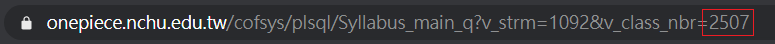

課綱頁面網址請至[課程查詢](https://onepiece.nchu.edu.tw/cofsys/plsql/crseqry_all)找到想選的課程後，點擊該課程的選課號碼後進入的便是課綱頁面。

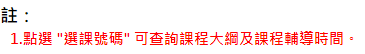

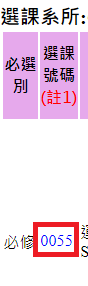

In [ ]:
# @title 課號加選-資料填寫&執行

# @markdown <a href='#scrollTo=rf31bcNpE1MU'>課程代號(點我看說明)</a>，採直接加選系統，可以填入<b>任意課程代號</b>，請確保代號正確，多個請用空格隔開，格式如:<br>4705 3803 1750 3494
v_class_nbr = '1800 2507 5224' #@param {type:"string"}
# @markdown 載入失敗(未開放)時重試
load_retry = True #@param {type:"boolean"}
# @markdown 加選失敗時重試
add_retry = True #@param {type:"boolean"}
# @markdown 重試間隔(單位：秒)，最後一秒會隨機取0~1之間。
delay = 2 #@param {type:"slider", min:0, max:5, step:1}

try: rs
except NameError:
	print('執行中斷：請先執行登入區塊')
	exit()

try: v_class_nbr = v_class_nbr.split(' ')
except: v_class_nbr = input("請以空格隔開輸入要加選的課程代號: ").split(' ')

data = { 'p_stud_no': uid, 'v_tick': v_class_nbr }

if token: lineNotify('開始直接加選...')
else: print('開始直接加選...')
print()

## 課號加選-填寫，看開不開放，同時向伺服器拿'cookie_key'(若有)
r=rs.get(plsql+'enro_direct1_list',headers=headers)
if r.text.rfind('本時段不開放此功能') != -1: print('本時段不開放此功能。')

load_count = 1
while (load_retry and r.text.rfind('本時段不開放此功能') != -1):
	r=None
	load_count += 1
	print('['+str(datetime.today()+timedelta(hours=8))+'] 載入失敗第 ', load_count,' 次，本時段不開放此功能。',end='')
	wait(delay)

	r=rs.get(plsql+'enro_direct1_list',headers=headers)
	clear_output(True)

print('['+str(datetime.today()+timedelta(hours=8))+'] ',uid,'加選結果', end=' ')
cookie_key=False
if rs.cookies.get('cookie_key'):
	cookie_key=True
	print(rs.cookies.get('cookie_key'), end=' ')
print('...')

## 課號加選-完成
r=rs.post(plsql+'enro_direct3_dml',headers=headers,data=data)
table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
if table:
	print('-'.join([th.text for th in table.findAll('th')]))
	index = 0
	for td in table.findAll('td'):
		index += 1
		if index%len(table.findAll('th'))==0:
			if add_retry: add_retry = (
				td.text.find('該類課程每學期只可加選一門') == -1 and
				td.text.find('本學期已選修超過4門通識課程') == -1 and
				td.text.find('選課時間有誤') == -1 and
				td.text.find('該課程已選') == -1 and
				td.text.find('名稱相同') == -1 and
				td.text.find('衝堂') == -1
			)
			print(td.text)
		else: print(td.text, end = '-')
		if index==len(v_class_nbr)*len(table.findAll('th')): break

count = 1
while add_retry:
	add_retry = False
	r=None
	count += 1
	print('['+str(datetime.today()+timedelta(hours=8))+'] 加選失敗第 ', count,' 次。',end='')
	wait(delay)

	print('['+str(datetime.today()+timedelta(hours=8))+'] ',uid,'加選結果', end=' ')
	if cookie_key:
		r=rs.get(plsql+'enro_direct1_list',headers=headers)
		print(rs.cookies.get('cookie_key'), end=' ')
	print('...')

	r=rs.post(plsql+'enro_direct3_dml',headers=headers,data=data)
	table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
	if table:
		print('-'.join([th.text for th in table.findAll('th')]))
		index = 0
		for td in table.findAll('td'):
			index += 1
			if index%len(table.findAll('th'))==0:
				add_retry = add_retry or (
					td.text.find('該類課程每學期只可加選一門') == -1 and
					td.text.find('本學期已選修超過4門通識課程') == -1 and
					td.text.find('選課時間有誤') == -1 and
					td.text.find('該課程已選') == -1 and
					td.text.find('名稱相同') == -1 and
					td.text.find('衝堂') == -1
				)
				print(td.text)
			else: print(td.text, end = '-')
			if index==len(v_class_nbr)*len(table.findAll('th')): break
print()

# 加選結果訊息
add_resault = '總計載入 '+str(load_count)+' 次，送出加選 '+str(count)+''' 次，加選結果:
'''
if table:
    add_resault += '-'.join([th.text for th in table.findAll('th')])+'''
'''
    index = 0
    for td in table.findAll('td'):
        index += 1
        if index==len(v_class_nbr)*len(table.findAll('th')):
            add_resault += td.text
            break
        if index%len(table.findAll('th'))==0: add_resault += td.text+'''
'''
        else: add_resault += td.text+'-'

## 到學生選課主畫面看目前選課狀態
resault = '''目前選課狀態...
'''
r=rs.post(plsql+'enro_main',headers=headers)
table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
if table:
	resault += ('-'.join([th.text for th in table.findAll('th')]))
	count = 0
	for td in table.findAll('td'):
		count += 1
		if count==len(table.findAll('td')): resault += td.text
		elif count%len(table.findAll('th'))==0: resault += td.text+'''
'''
		else: resault += td.text+'-'
if token:
    lineNotify(resault)
    print()
    lineNotify(add_resault)
else:
    print('['+str(datetime.today()+timedelta(hours=8))+'] '+resault)
    print()
    print('['+str(datetime.today()+timedelta(hours=8))+'] '+add_resault)

In [ ]:
#@title 通識加選-資料填寫&執行
 
#@markdown <a href='#scrollTo=rf31bcNpE1MU'>課程代號(點我看說明)</a>，採通識加選系統，限填入<b>通識課程代號</b>，請確保代號正確，多個請用空格隔開，格式如:<br>0628 2027 0004
v_class_nbr = '2507 5224 3290' #@param {type:"string"}
#@markdown 載入失敗(未開放)時重試
load_retry = True #@param {type:"boolean"}
#@markdown 加選失敗時重試
add_retry = False #@param {type:"boolean"}
#@markdown 重試間隔，規格同上
delay = 2 #@param {type:"slider", min:0, max:5, step:1}
 
try: rs
except NameError:
    print('執行中斷：請先執行登入區塊')
    exit()
 
try: v_class_nbr = v_class_nbr.split(' ')
except: v_class_nbr = input("請以空格隔開輸入要加選的通識課程代號: ").split(' ')

data = { 'v_click': v_class_nbr }
 
if token: lineNotify('開始通識加選...')
else: print('開始通識加選...')
print()

## 通識加選-選擇清單，看開不開放，順便向伺服器拿'cookie_key'
r=rs.get(plsql+'gned_add2_list',headers=headers)
if r.text.rfind('本時段不開放此功能') != -1: print('本時段不開放此功能。')
 
load_count = 1
while (load_retry and r.text.rfind('本時段不開放此功能') != -1):
	r=None
	load_count += 1
	print('['+str(datetime.today()+timedelta(hours=8))+'] 載入失敗第', load_count,'次，本時段不開放加選。',end='')

	wait(delay)
	r=rs.get(plsql+'gned_add2_list',headers=headers)
	clear_output(True)

print('['+str(datetime.today()+timedelta(hours=8))+'] ',uid,'加選結果', end=' ')
cookie_key=False
if rs.cookies.get('cookie_key'):
    cookie_key=True
    print(rs.cookies.get('cookie_key'), end=' ')
print('...')

## 通識加選-確認
r=rs.post(plsql+'gned_add4_dml',headers=headers,data=data)
table=bs(r.text, 'lxml').find('table', {'width': '780'})
if table:
	print('-'.join([th.text for th in table.findAll('th')]))
	index = 0
	for td in table.findAll('td'):
		index += 1
		if index%len(table.findAll('th'))==0:
			if add_retry: add_retry = (
				td.text.find('該類課程每學期只可加選一門') == -1 and
				td.text.find('本學期已選修超過4門通識課程') == -1 and
				td.text.find('選課時間有誤') == -1 and
				td.text.find('該課程已選') == -1 and
				td.text.find('名稱相同') == -1 and
				td.text.find('衝堂') == -1
			)
			print(td.text)
		else: print(td.text, end = '-')
		if index==len(v_class_nbr)*len(table.findAll('th')): break
 
count = 1
while (add_retry and (r.text.rfind('失敗') != -1 or r.text.rfind('選課時間有誤') != -1)):
    r=None
    count += 1
    print('['+str(datetime.today()+timedelta(hours=8))+'] 加選失敗第', count,'次。',end='')
    wait(delay)
 
    print('['+str(datetime.today()+timedelta(hours=8))+'] ',uid,'加選結果', end=' ')
    if cookie_key:
        r=rs.get(plsql+'gned_add2_list',headers=headers)
        print(rs.cookies.get('cookie_key'), end=' ')
    print('...')
 
    r=rs.post(plsql+'gned_add4_dml',headers=headers,data=data)
    table=bs(r.text, 'lxml').find('table', {'width': '780'})
    if table:
        print('-'.join([th.text for th in table.findAll('th')]))
        index = 0
        for td in table.findAll('td'):
            index += 1
            if index%len(table.findAll('th'))==0:
                add_retry = add_retry or (
                    td.text.find('該類課程每學期只可加選一門') == -1 and
                    td.text.find('本學期已選修超過4門通識課程') == -1 and
                    td.text.find('選課時間有誤') == -1 and
                    td.text.find('該課程已選') == -1 and
                    td.text.find('名稱相同') == -1 and
                    td.text.find('衝堂') == -1
                )
                print(td.text)
            else: print(td.text, end = '-')
            if index==len(v_class_nbr)*len(table.findAll('th')): break
print()

# 加選結果訊息
add_resault = '總計載入 '+str(load_count)+' 次，送出加選 '+str(count)+''' 次，加選結果:
'''
if table:
    add_resault += '-'.join([th.text for th in table.findAll('th')])+'''
'''
    index = 0
    for td in table.findAll('td'):
        index += 1
        if index==len(v_class_nbr)*len(table.findAll('th')):
            add_resault += td.text
            break
        if index%len(table.findAll('th'))==0: add_resault += td.text+'''
'''
        else: add_resault += td.text+'-'

## 到學生選課主畫面看目前選課狀態
resault = '''目前選課狀態...
'''
r=rs.post(plsql+'enro_main',headers=headers)
table=bs(r.text, 'lxml').find('table', {'cellpadding': '2'})
if table:
	resault += ('-'.join([th.text for th in table.findAll('th')]))
	count = 0
	for td in table.findAll('td'):
		count += 1
		if count==len(table.findAll('td')): resault += td.text
		elif count%len(table.findAll('th'))==0: resault += td.text+'''
'''
		else: resault += td.text+'-'
if token:
    lineNotify(resault)
    print()
    lineNotify(add_resault)
else:
    print('['+str(datetime.today()+timedelta(hours=8))+'] '+resault)
    print()
    print('['+str(datetime.today()+timedelta(hours=8))+'] '+add_resault)